In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "../Fertility and Mortality Indicators.csv"

data = pd.read_csv(file_path, encoding='latin1', skiprows=1)
data.columns = ['Region/Country/Area', 'Category', 'Year', 'Series', 'Value', 'Footnotes', 'Source']

data_2020 = data[data['Year'] == 2020]
relevant_data = data_2020[data_2020['Series'].isin([
    'Infant mortality for both sexes (per 1,000 live births)',
    'Life expectancy at birth for both sexes (years)'
])]

pivot_df = relevant_data.pivot(index='Region/Country/Area', columns='Series', values='Value').reset_index()
pivot_df = pivot_df.dropna()
pivot_df



Series,Region/Country/Area,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years)
0,1,28.3,72.0
1,2,46.4,62.2
2,4,45.8,62.6
3,5,12.7,74.0
4,8,8.8,77.0
...,...,...,...
213,860,12.5,70.3
214,862,15.7,71.1
215,882,14.4,72.8
216,887,45.9,64.7


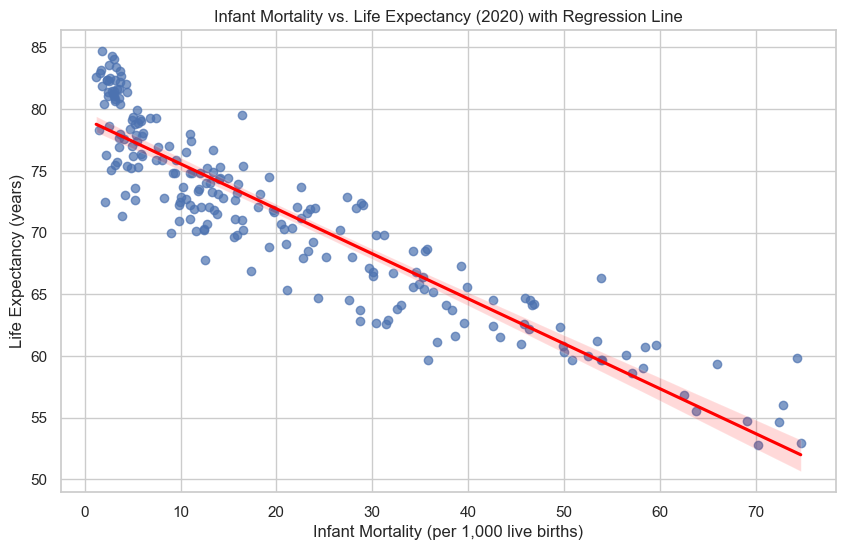

In [53]:

pivot_df['Infant mortality for both sexes (per 1,000 live births)'] = pd.to_numeric(pivot_df['Infant mortality for both sexes (per 1,000 live births)'])
pivot_df['Life expectancy at birth for both sexes (years)'] = pd.to_numeric(pivot_df['Life expectancy at birth for both sexes (years)'])
pivot_df.head()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Infant mortality for both sexes (per 1,000 live births)',
    y='Life expectancy at birth for both sexes (years)',
    data=pivot_df,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('Infant Mortality vs. Life Expectancy (2020) with Regression Line')
plt.xlabel('Infant Mortality (per 1,000 live births)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

El gráfico muestra la relación entre la tasa de mortalidad infantil y la esperanza de vida al nacer para ambos sexos en el año 2020. Se puede observar una tendencia general donde los países con tasas de mortalidad infantil más bajas tienden a tener una mayor esperanza de vida. Esto sugiere que mejoras en la salud infantil y reducciones en la mortalidad infantil están correlacionadas con una mayor esperanza de vida en general

<Figure size 1000x600 with 0 Axes>

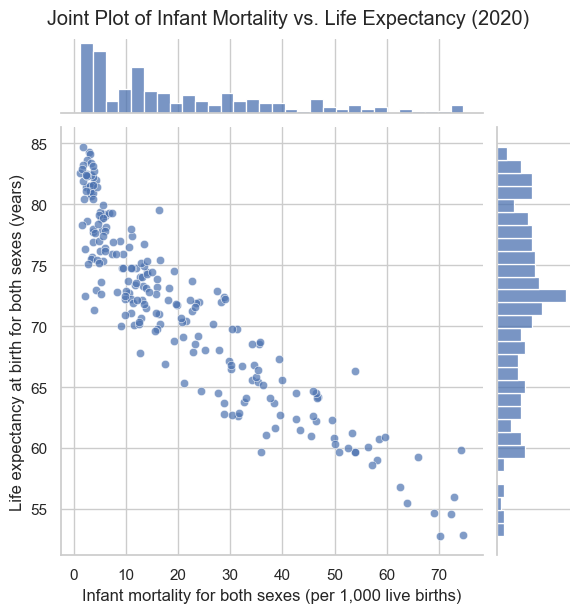

In [54]:
plt.figure(figsize=(10, 6))
sns.jointplot(
    x='Infant mortality for both sexes (per 1,000 live births)',
    y='Life expectancy at birth for both sexes (years)',
    data=pivot_df,
    kind='scatter',
    alpha=0.7,
    marginal_kws=dict(bins=30, fill=True)
)
plt.suptitle('Joint Plot of Infant Mortality vs. Life Expectancy (2020)', y=1.02)
plt.show()

Esta tabala también sugiere que los países con tasas de mortalidad infantil más bajas tienden a tener una mayor esperanza de vida. Esto puede ser debido a factores como mejores sistemas de salud, mayor acceso a atención médica, y mejores condiciones socioeconómicas en general.

Las fuertes correlaciones entre la mortalidad infantil, la mortalidad materna y la esperanza de vida sugieren que la calidad del sistema de salud de un país impacta significativamente en estas métricas.
Mientras que las altas tasas de fertilidad están asociadas con mayores tasas de mortalidad infantil y materna, lo cual podría estar relacionado con factores socioeconómicos y de salud.